In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,X,y
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1:]

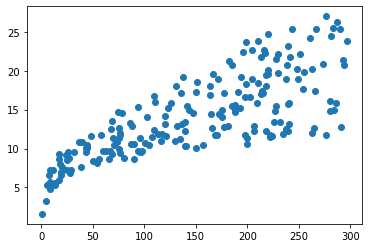

In [5]:
plt.scatter(X,y)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1]))

In [7]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, epochs=500)

In [ ]:
history.history

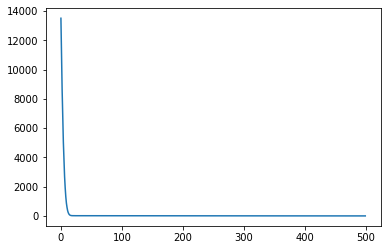

In [10]:
plt.plot(history.history['loss'])

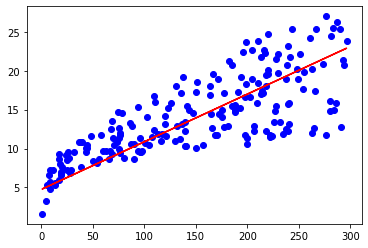

In [11]:
plt.scatter(X,y,color='blue')
plt.plot(X, model.predict(X),color='red')

# Fashion MNIST

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [14]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

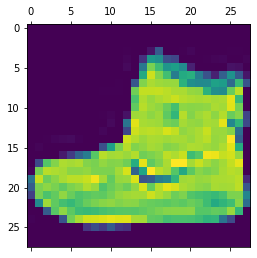

In [26]:
plt.matshow(X_train[0])

In [27]:
y_train[0]

9

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6298 - accuracy: 0.7815
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9042
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2549 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

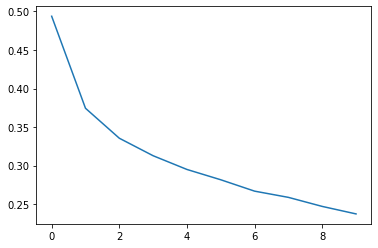

In [30]:
plt.plot(history.history['loss'])

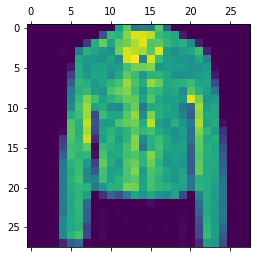

In [31]:
plt.matshow(X_test[10])

In [32]:
y_test[10]

4

In [33]:
model.predict(X_test[10].reshape(1,784))

array([[9.4085983e-05, 1.2635852e-08, 3.3874765e-01, 3.0222798e-09,
        6.4780092e-01, 9.0766420e-08, 1.3356761e-02, 3.7161454e-11,
        5.2138557e-07, 5.0469858e-08]], dtype=float32)

In [34]:
np.argmax(model.predict(X_test[10].reshape(1,784)))

4

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3687 - accuracy: 0.8730


[0.3686569035053253, 0.8730000257492065]